<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Final Projects// Mohamad Syaipul Anwar</font></h1>

**Rain in Australia**<br>
Predict next-day rain in Australia<br>

Dataset ini berisi pengamatan cuaca setiap hari selama 10 tahun dari banyak lokasi di seluruh Australia.
kolom RainTomorrow adalah variabel target untuk diprediksi. Artinya kolom tersebut akan menentukan apakah hari berikutnya hujan atau Tidak. Kolom ini akan berisi ya jika hujan untuk hari itu mempunyai volume air 1mm atau lebih.

Dataset ini terdiri dari:
1. Date: Tanggal pengamatan
2. Location: Nama umum lokasi stasiun cuaca
3. MinTemp: Suhu minimum dalam derajat celsius
4. MaxTemp: Suhu maksimum dalam derajat celsius
5. Rainfall: Jumlah curah hujan yang tercatat untuk hari itu dalam mm
6. Evaporation: penguapan (mm) dalam 24 jam hingga jam 9 pagi
7. Sunshine: Jumlah jam sinar matahari yang cerah dalam sehari.
8. WindGustDir: Arah hembusan angin terkuat dalam 24 jam hingga tengah malam
9. WindGustSpeed: Kecepatan (km/j) hembusan angin terkuat dalam 24 jam hingga tengah malam
10. WindDir9am: Arah angin pukul 9am
11. WindDir3pm: Arah angin pada jam 3 sore
12. WindSpeed9am: Kecepatan angin (km/jam) rata-rata lebih dari 10 menit sebelum pukul 9 pagi
13. WindSpeed3pm: Kecepatan angin (km/jam) rata-rata lebih dari 10 menit sebelum pukul 15:00   
14. Humidity9am: Kelembaban (persen) pada 9am
15. Humidity3pm: Kelembaban (persen) pada pukul 15:00
16. Pressure9am: Tekanan atmosfer (hpa) berkurang menjadi rata-rata permukaan laut pada 9am
17. Pressure3pm: Tekanan atmosfer (hpa) berkurang menjadi rata-rata permukaan laut pada pukul 15:00
18. Cloud9am: Bagian langit yang tertutup awan pada pukul 9 pagi. Ini diukur dalam "okta", yang merupakan satuan delapan. Ini mencatat berapa perdelapan langit yang tertutup awan. Ukuran 0 menunjukkan sepenuhnya 20. langit cerah sementara angka 8 menunjukkan bahwa itu benar-benar mendung.
19. Cloud3pm: Bagian langit yang tertutup awan (dalam "oktas": perdelapan) pada pukul 3 sore. Lihat Cload9am untuk deskripsi nilainya
20. Temp9am: Suhu (derajat C) pada 9am
21. Temp3pm: Suhu (derajat C) pada 3pm
22. RainToday: Boolean: 1 jika curah hujan (mm) dalam 24 jam hingga pukul 9 pagi melebihi 1 mm, jika tidak 0
23. RainTomorrow: Variabel target. Apakah besok hujan?

## **Data Preparation**

In [1]:
#import library yang diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn import metrics
from time import time
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Load dataset
df= pd.read_csv("data/weatherAUS.csv")
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
# Melihat 5 data teratas
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Melihat 5 data terbawah
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [5]:
# Melihat Dimensi data
df.shape

(145460, 23)

In [6]:
# Melihat Type data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Insight**

Dataset ini terdiri dari 145460 baris dan 23 kolom. pada dataset terdapat 2 type data, yaitu object dan float64

## **Exploratory Data Analysis**


In [7]:
# Mengecek 'Missing Value' dari dataset
print(df.isnull().sum())

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


Dari hasil diatas, dapat dilihat bahwa dataset yang digunakan memiliki banyak sekali 'Missing Values' sehingga diperlukan data cleaning, sebelum data tersebut digunakan untuk pemodelan.

In [8]:
# Melihat 'Categorial Data' dan 'Numerical Data' pada dataset
df.describe(exclude="number")

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## **Data Cleaning**


In [10]:
# Melakukan Drop data jika 'Missing Value' lebih dari 10%
# membuat variable untuk menapungg data yang akan dihapus
col_delete = df.apply(lambda x: f'{(x.isnull().sum()/df.shape[0]).round(2)} %').sort_values()
col_delete

Date              0.0 %
Location          0.0 %
Temp9am          0.01 %
WindSpeed9am     0.01 %
MinTemp          0.01 %
MaxTemp          0.01 %
Rainfall         0.02 %
Temp3pm          0.02 %
WindSpeed3pm     0.02 %
RainToday        0.02 %
Humidity9am      0.02 %
RainTomorrow     0.02 %
Humidity3pm      0.03 %
WindDir3pm       0.03 %
WindDir9am       0.07 %
WindGustSpeed    0.07 %
WindGustDir      0.07 %
Pressure9am       0.1 %
Pressure3pm       0.1 %
Cloud9am         0.38 %
Cloud3pm         0.41 %
Evaporation      0.43 %
Sunshine         0.48 %
dtype: object

In [11]:
# hapus kolom yang berisi data kosong yang lebih dari 10%
df.drop(col_delete.index.to_list()[-4:], axis = 1, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Temp9am        143693 non-null  float64
 16  Temp3pm        141851 non-null  float64
 17  RainToday      142199 non-nul

Pada hasil diatas, kita telah berhasil membersihkan 4 kolom data yang memiliki 'Missing Values' terbanyak.

In [13]:
# Melakukan pengelompokan kolom menjadi numerical dan categorical
def get_cols(df) -> list:
    '''
    function return list of name numbers and categorials columns
    '''
    categorical_feature_mask = df.dtypes == object
    number_feature_mask = df.dtypes != object
    numbers_cols = df.columns[number_feature_mask].tolist()
    categorical_cols = df.columns[categorical_feature_mask].tolist()
    return [numbers_cols, categorical_cols]

num_cols, cat_cols = get_cols(df)

In [14]:
# Melakukan Imputansi terhadap dataset
imp_mean_num = SimpleImputer(strategy='mean')
imp_mean_cat = SimpleImputer(strategy='most_frequent')

for col in df.columns.to_list():
    if col in num_cols:
        df[col] = imp_mean_num.fit_transform(df[[col]])
    else:
        df[col] = imp_mean_cat.fit_transform(df[[col]])

In [15]:
# Mengecek 'Missing Value' dari dataset
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Pada tahap ini, 'Missing Values' pada data sudah selesai dibersihkan

In [17]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,W,44.00000,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,WNW,44.00000,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,WSW,46.00000,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,NE,24.00000,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,W,41.00000,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,E,31.00000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.300000,0.0,NNW,22.00000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.900000,0.0,N,37.00000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.000000,0.0,SE,28.00000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


Pada hasil diatas dapat terlihat bahwa 'Missing Values' sudah tidak ada, namun pada kolom dataset masih terdapat data yang berbentuk string. pada tahap selanjutnya akan dilakukan Label Encoder agar data tersebut menjadi bentuk bilangan.

In [18]:
#Inisiasi Label Encoder
lbl_enc = LabelEncoder()

In [19]:
df.loc[:, "RainTomorrow"] = lbl_enc.fit_transform(df['RainTomorrow'].values)
df.loc[:, "Location"] = lbl_enc.fit_transform(df['Location'].values)
df.loc[:, "WindGustDir"] = lbl_enc.fit_transform(df['WindGustDir'].values)
df.loc[:, "WindDir9am"] = lbl_enc.fit_transform(df['WindDir9am'].values)
df.loc[:, "WindDir3pm"] = lbl_enc.fit_transform(df['WindDir3pm'].values)
df.loc[:, "RainToday"] = lbl_enc.fit_transform(df['RainToday'].values)

# Melakukan drop kolom tanggal dari database
df.drop(['Date'], axis = 1, inplace = True)

In [20]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


Pada hasil diatas dapat terlihat bahwa data sepenuhnya sudah berbentuk angka, dan siap untuk lanjut ketahap pemodelan.

## **Data Visualization**

Untuk bagian ini dilakukan visualisasi untuk beberapa kolom, hal ini dilakukan untuk mengetahui outliers dari kolom tersebut

Text(0, 0.5, 'WindSpeed3pm')

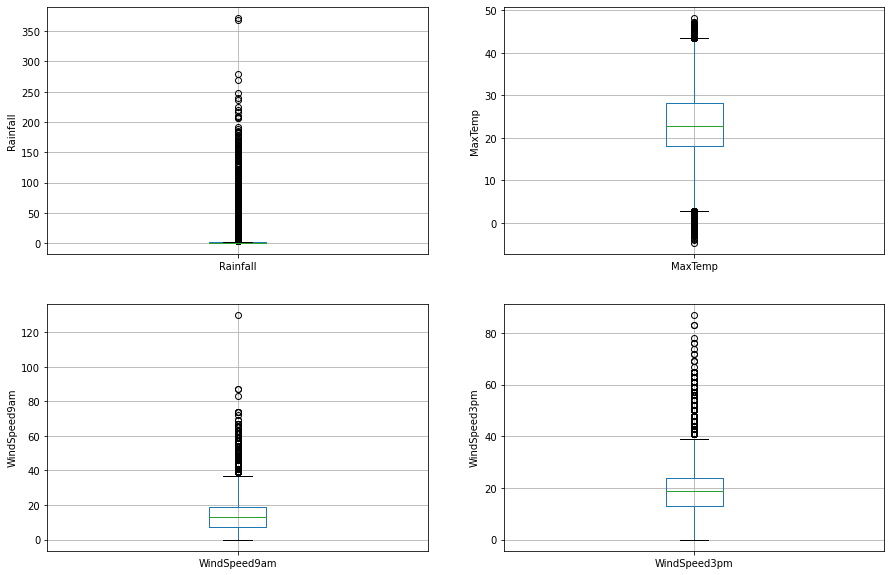

In [21]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='MaxTemp')
fig.set_title('')
fig.set_ylabel('MaxTemp')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

In [22]:
# find outliers for Rainfall variable
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 1.5)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# find outliers for MaxTemp variable

IQR = df.MaxTemp.quantile(0.75) - df.MaxTemp.quantile(0.25)
Lower_fence = df.MaxTemp.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.MaxTemp.quantile(0.75) + (IQR * 1.5)
print('MaxTemp outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 1.5)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 1.5)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -1.5 or > 2.5
MaxTemp outliers are values < 2.700000000000001 or > 43.5
WindSpeed9am outliers are values < -11.0 or > 37.0
WindSpeed3pm outliers are values < -3.5 or > 40.5


**Insight**:

Untuk Curah Hujan, nilai minimum dan maksimumnya adalah -1,5 dan 2,5. Jadi, outliernya adalah nilai > 2.5
Untuk MaxTemp, nilai minimum dan maksimumnya adalah 2,7 dan 43,5. Jadi, outliernya adalah nilai > 43,5.
Untuk WindSpeed9am, nilai minimum dan maksimum adalah -11,0 dan 37.0. Jadi, outliernya adalah nilai > 37
Untuk WindSpeed3pm, nilai minimum dan maksimum adalah -3,5 dan 40.5. Jadi, outliernya adalah nilai > 40,5

In [23]:
correlation = df.corr()

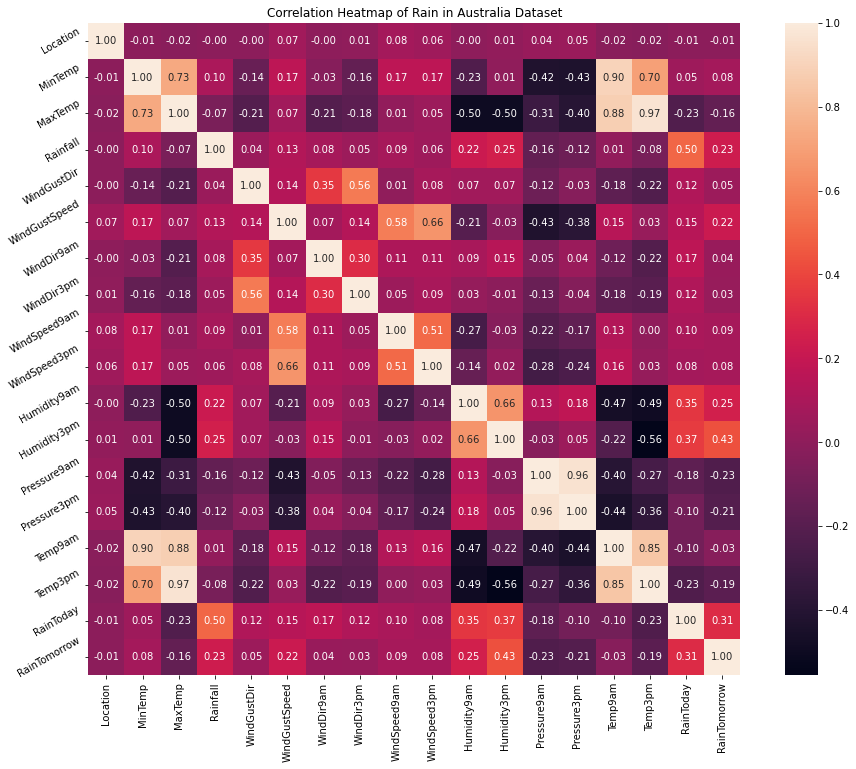

In [24]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

**Insight**

Dari correlation heat map, dapat kita ketahui:-
1. Variabel MinTemp dan MaxTemp berkorelasi sangat positif (koefisien korelasi = 0,73).
2. Variabel MinTemp dan Temp3pm juga berkorelasi sangat positif (koefisien korelasi = 0,70).
3. Variabel MinTemp dan Temp9am berkorelasi positif kuat (koefisien korelasi = 0,90).
4. Variabel MaxTemp dan Temp9am berkorelasi positif kuat (koefisien korelasi = 0,88).
5. Variabel MaxTemp dan Temp3pm juga berkorelasi positif kuat (koefisien korelasi = 0,97).
6. Variabel WindGustSpeed ​​dan WindSpeed3pm berkorelasi sangat positif (koefisien korelasi = 0,66).
7. Variabel Pressure9am dan Pressure3pm berkorelasi positif kuat (koefisien korelasi = 0,96).
8. Variabel Temp9am dan Temp3pm berkorelasi positif kuat (koefisien korelasi = 0,85)

## **Data Modeling**

In [25]:
# pisahkan data y dengan data x
X=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']

In [26]:
df.apply(lambda x : len(x.unique()))

Location          49
MinTemp          390
MaxTemp          506
Rainfall         682
WindGustDir       16
WindGustSpeed     68
WindDir9am        16
WindDir3pm        16
WindSpeed9am      44
WindSpeed3pm      45
Humidity9am      102
Humidity3pm      102
Pressure9am      547
Pressure3pm      550
Temp9am          442
Temp3pm          503
RainToday          2
RainTomorrow       2
dtype: int64

## **Training and Testing Model**

Pada bagian ini, Training dan Testing Model akan dilakukan menggunakan 4 jenis pemodelan: yaitu Logistic Regression, Random Forest, Gausian Naive Bayes dan Decision Tree Classifier. Hal ini dilakukan agar mendapatkan pemodelan yang paling optimal.

In [29]:
scored=[]

In [30]:
def train_model(X, y, model, test_size=.3):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=test_size, random_state=99 )
    print(f"Training with {X_train.shape[0]} data.. Validating with {X_test.shape[0]}..")
    print("Standardizing data..")
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    start = time()
    model.fit(scaled_X_train, y_train)
    end = time()
    print(f"Done training {model.__class__.__name__} in {end-start:.3f}s")
    
    train_prediction = model.predict(scaled_X_train)
    test_prediction = model.predict(scaled_X_test)
    Score = metrics.accuracy_score(y_test, test_prediction)
    
    
    print("Training performance:")
    print(classification_report(y_train, train_prediction))

    print("Testing performance:")
    print(classification_report(y_test, test_prediction))
    
    print("Testing Data Confusion Matrix Visualization")
    plot_confusion_matrix(model, X_test, y_test)

    print('Accuracy Score: %.5f' % Score)

    scored.append(Score)

### Logistic Regression

Training with 101822 data.. Validating with 43638..
Standardizing data..
Done training LogisticRegression in 1.063s
Training performance:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     79559
           1       0.71      0.45      0.55     22263

    accuracy                           0.84    101822
   macro avg       0.79      0.70      0.73    101822
weighted avg       0.83      0.84      0.83    101822

Testing performance:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     34024
           1       0.72      0.45      0.56      9614

    accuracy                           0.84     43638
   macro avg       0.79      0.70      0.73     43638
weighted avg       0.83      0.84      0.83     43638

Testing Data Confusion Matrix Visualization
Accuracy Score: 0.84085


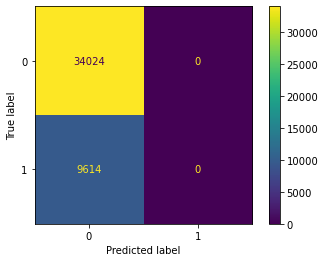

In [31]:
train_model(X,y,LogisticRegression())

### Random Forest

Training with 101822 data.. Validating with 43638..
Standardizing data..
Done training RandomForestClassifier in 53.431s
Training performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79559
           1       1.00      1.00      1.00     22263

    accuracy                           1.00    101822
   macro avg       1.00      1.00      1.00    101822
weighted avg       1.00      1.00      1.00    101822

Testing performance:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     34024
           1       0.75      0.48      0.59      9614

    accuracy                           0.85     43638
   macro avg       0.81      0.72      0.75     43638
weighted avg       0.84      0.85      0.84     43638

Testing Data Confusion Matrix Visualization
Accuracy Score: 0.85121


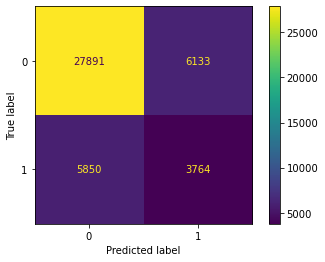

In [32]:
train_model(X, y, RandomForestClassifier())

### Gaussian Naive Bayes

Training with 101822 data.. Validating with 43638..
Standardizing data..
Done training GaussianNB in 0.226s
Training performance:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     79559
           1       0.57      0.51      0.54     22263

    accuracy                           0.81    101822
   macro avg       0.72      0.70      0.71    101822
weighted avg       0.80      0.81      0.80    101822

Testing performance:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88     34024
           1       0.57      0.51      0.54      9614

    accuracy                           0.81     43638
   macro avg       0.72      0.70      0.71     43638
weighted avg       0.80      0.81      0.80     43638

Testing Data Confusion Matrix Visualization
Accuracy Score: 0.80700


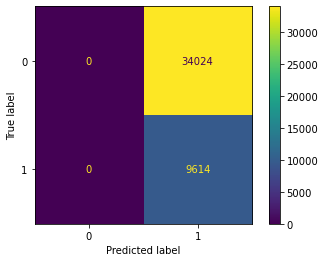

In [33]:
train_model(X,y,GaussianNB())

### Decision Tree Classifier

Training with 101822 data.. Validating with 43638..
Standardizing data..
Done training DecisionTreeClassifier in 3.169s
Training performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79559
           1       1.00      1.00      1.00     22263

    accuracy                           1.00    101822
   macro avg       1.00      1.00      1.00    101822
weighted avg       1.00      1.00      1.00    101822

Testing performance:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     34024
           1       0.51      0.52      0.51      9614

    accuracy                           0.78     43638
   macro avg       0.68      0.69      0.69     43638
weighted avg       0.78      0.78      0.78     43638

Testing Data Confusion Matrix Visualization
Accuracy Score: 0.78230


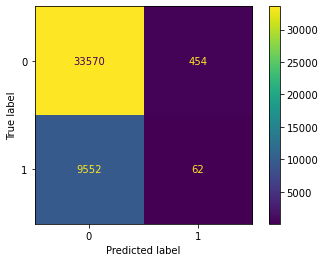

In [34]:
train_model(X,y,DecisionTreeClassifier())

## **Comparing All Algorithms**

In [35]:
Table_Summary = pd.DataFrame({'Machine Learning Algorithm':['Logistic Regression', 'Random Forest', 'G. Naive bayes', 'Decision Tree'],
                    'Accuracy Score':scored,
                    })
Table_Summary.sort_values(by=['Accuracy Score'], ascending=False)

,Machine Learning Algorithm,Accuracy Score
1,Random Forest,0.851208
0,Logistic Regression,0.840850
2,G. Naive bayes,0.807003
3,Decision Tree,0.782300


Untuk Dataset ini, jenis pemodelan yang cocok digunakan adalah Random Forest, karena akurasi skor yang didapat paling besar dan waktu pemrosesan nya sangat cepat.

## **Evaluasi Model**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=99)

In [38]:
ranreg = RandomForestClassifier()
ranreg.fit(X_train, y_train)
y_pred = ranreg.predict(X_test)
print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(ranreg.score(X_test, y_test)))

Accuracy of Random Forest Classifier on test set: 0.85


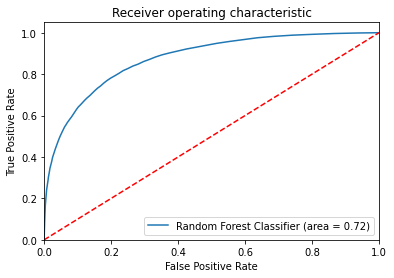

In [39]:
# Menampilkan grafik ROC
logit_roc_auc = roc_auc_score(y_test, ranreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, ranreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Kurva karakteristik operasi penerima (ROC) adalah alat umum yang digunakan dengan pengklasifikasi biner. Garis putus-putus mewakili kurva ROC dari pengklasifikasi acak murni, pengklasifikasian yang baik akan tetap sejauh mungkin dari garis itu (menuju sudut kiri atas).

In [40]:
cm=confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[32508  1516]
 [ 4915  4699]]

True Positives(TP) =  32508

True Negatives(TN) =  4699

False Positives(FP) =  1516

False Negatives(FN) =  4915


In [41]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                index=['Predict Positive:1', 'Predict Negative:0'])
cm_matrix.head()

,Actual Positive:1,Actual Negative:0
Predict Positive:1,32508,1516
Predict Negative:0,4915,4699


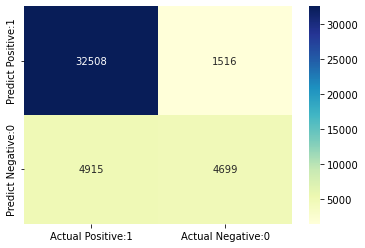

In [42]:
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu');

### **Insight**

Setelah melakukan eksplorasi eksplorasi pada data, train model dan test model didapatkan hasil :
- Ada beberapa data yang memerlukan Labeling Encoding sebelum dilakukan modeling
- ada beberapa data yang berkolerasi kuat dengan data lainnya
- Keempat model yang dipakai untuk test dan train sama sama memiliki f1-score yang seimbang.
- Random Forest merupakan algoritma machine learning yang memiliki Accuracy dan F1-score tertinggi, dengan accuracy sebesar 85%
- pemodelan dengan Decision Tree mendapatkan akurasi yang paling rendah.